In [1]:
import matplotlib.pyplot as plt
import torch._dynamo
torch._dynamo.config.suppress_errors = True

In [2]:
import torch
from flextok.flextok_wrapper import FlexTokFromHub

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FlexTokFromHub.from_pretrained('EPFL-VILAB/flextok_d18_d28_dfn').eval().to(device)

In [3]:
print(model.device)

cuda:0


In [4]:
from flextok.utils.demo import imgs_from_urls
# Load example images of shape (B, 3, 256, 256), normalized to [-1,1]
imgs = imgs_from_urls(urls=['https://storage.googleapis.com/flextok_site/nb_demo_images/0.png'])

In [5]:
imgs.shape

torch.Size([1, 3, 256, 256])

In [6]:
imgs = imgs.to(device)

In [7]:
# tokens_list is a list of [1, 256] discrete token sequences
tokens_list = model.tokenize(imgs)

W0409 17:37:19.731000 531231 torch/_dynamo/convert_frame.py:1233] WON'T CONVERT create_block_mask /home/ubuntu/repos/ml-flextok/debug/lib/python3.10/site-packages/torch/nn/attention/flex_attention.py line 823 
W0409 17:37:19.731000 531231 torch/_dynamo/convert_frame.py:1233] due to: 
W0409 17:37:19.731000 531231 torch/_dynamo/convert_frame.py:1233] Traceback (most recent call last):
W0409 17:37:19.731000 531231 torch/_dynamo/convert_frame.py:1233]   File "/home/ubuntu/repos/ml-flextok/debug/lib/python3.10/site-packages/torch/_dynamo/convert_frame.py", line 1164, in __call__
W0409 17:37:19.731000 531231 torch/_dynamo/convert_frame.py:1233]     result = self._inner_convert(
W0409 17:37:19.731000 531231 torch/_dynamo/convert_frame.py:1233]   File "/home/ubuntu/repos/ml-flextok/debug/lib/python3.10/site-packages/torch/_dynamo/convert_frame.py", line 547, in __call__
W0409 17:37:19.731000 531231 torch/_dynamo/convert_frame.py:1233]     return _compile(
W0409 17:37:19.731000 531231 torch/_dy

In [8]:
tokens_list

[tensor([[20403, 30981, 23502, 29433,  3963,   283, 29755, 20182, 12999, 20338,
          20467, 27391, 52597, 48100,  3997, 11470,  7611,  7546, 24469, 15023,
          32157, 33824, 18668,  3874, 54518, 25563, 55123, 41303,  5854, 16611,
          38603, 62488, 46585, 39364,  2274, 60872, 42907, 44935, 61278, 41715,
           1907, 62447, 49124,  6122, 36118, 44795, 35783, 27098,  4600,  2233,
          31251, 57310, 12570, 29603, 18163, 47130, 21746, 42523,  1496, 42214,
          43742, 49207, 62692, 17363,  5827, 41248, 30871, 61376, 12962,  3498,
           5779, 55767,  7103, 50552, 18352, 50527, 24323, 18307,  2863, 30176,
          48367, 57403, 24912, 14228, 15797, 22971,  1047, 41627, 10974, 58619,
           3672, 31454, 31416, 12254, 37055, 21744, 52926, 51909, 29248, 31502,
          60646, 33830, 48834, 42011, 39700, 42947, 39673, 33235,   120, 54076,
          15878, 56767,  5531, 37398, 30261, 14130, 48056,  2722,  5272, 32538,
           2232, 10843,  2753, 26203, 13

In [9]:
tokens_list[0].shape

torch.Size([1, 256])

In [17]:
k_keep = 256 # For example, only keep the first 64 out of 256 tokens
tokens_keep = [t[:,:k_keep] for t in tokens_list]

In [18]:
# tokens_list is a list of [1, l] discrete token sequences, with l <= 256
# reconst is a [B, 3, 256, 256] tensor, normalized to [-1,1]
reconst = model.detokenize(
    tokens_keep,
    timesteps=20, # Number of denoising steps
    guidance_scale=7.5, # Classifier-free guidance scale
    perform_norm_guidance=True, # See https://arxiv.org/abs/2410.02416
)

100%|██████████| 20/20 [00:07<00:00,  2.61it/s]


In [12]:
reconst.shape

torch.Size([1, 3, 256, 256])

In [19]:
recon_img = reconst.squeeze(0).permute(1,2,0).detach().cpu().numpy()
recon_img = (recon_img+1) / 2

In [20]:
orig_img = imgs.squeeze(0).permute(1,2,0).detach().cpu().numpy()
orig_img = (orig_img+1)/2

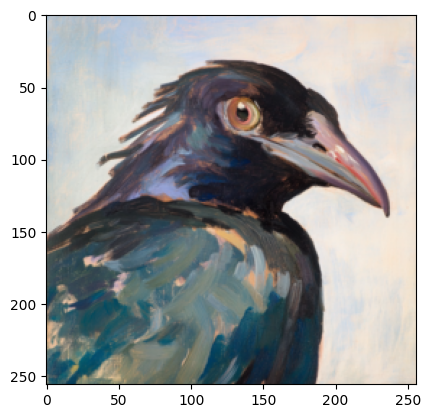

In [21]:
plt.imshow(orig_img)

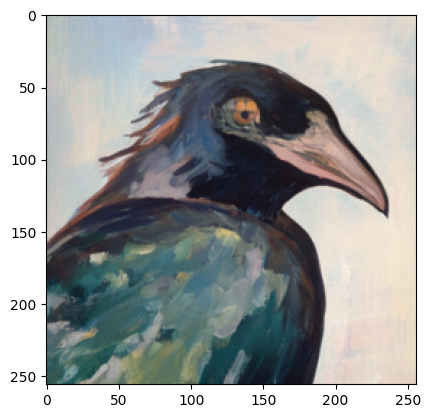

In [22]:
plt.imshow(recon_img)